# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the dataset


In [2]:
df = pd.read_csv('/kaggle/input/employee-salaries-for-different-job-roles/ds_salaries.csv')

# First few rows of the dataset


In [3]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Check for missing values in each column

In [4]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Get summary statistics for numerical columns

In [5]:
summary_stats = df.describe()
print("\nSummary statistics for numerical columns:")
print(summary_stats)


Summary statistics for numerical columns:
       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000


# EDA AND DATA VIZ

## Salary Distribution Across Job Titles

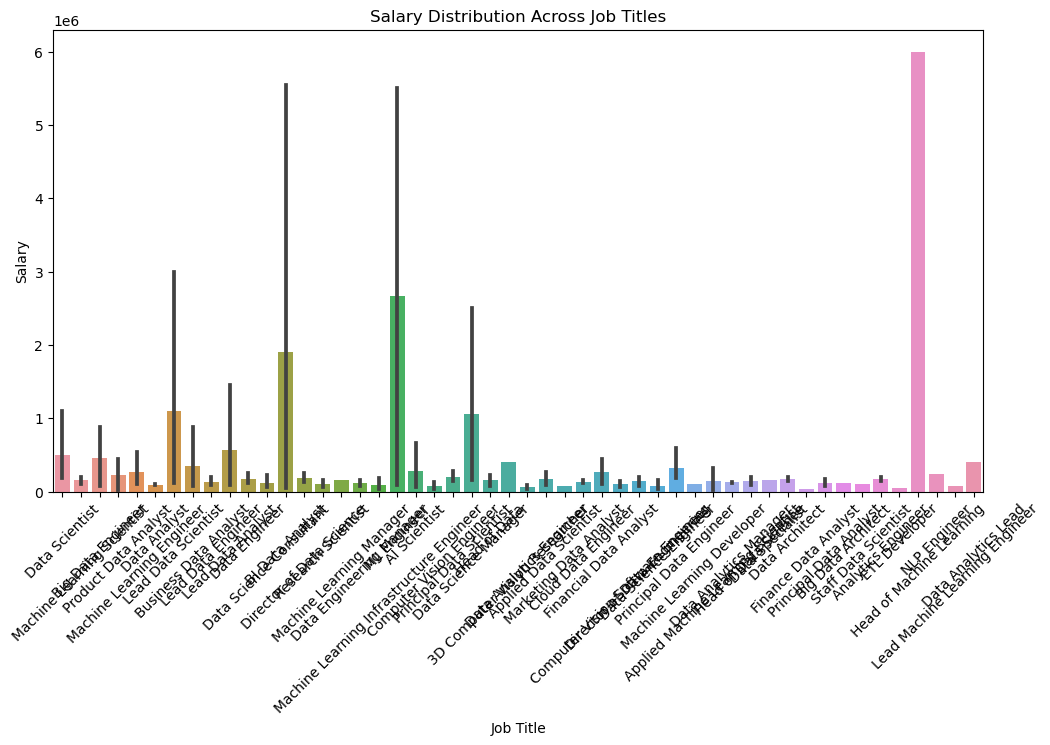

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

## Salary Distribution Across Experience Levels

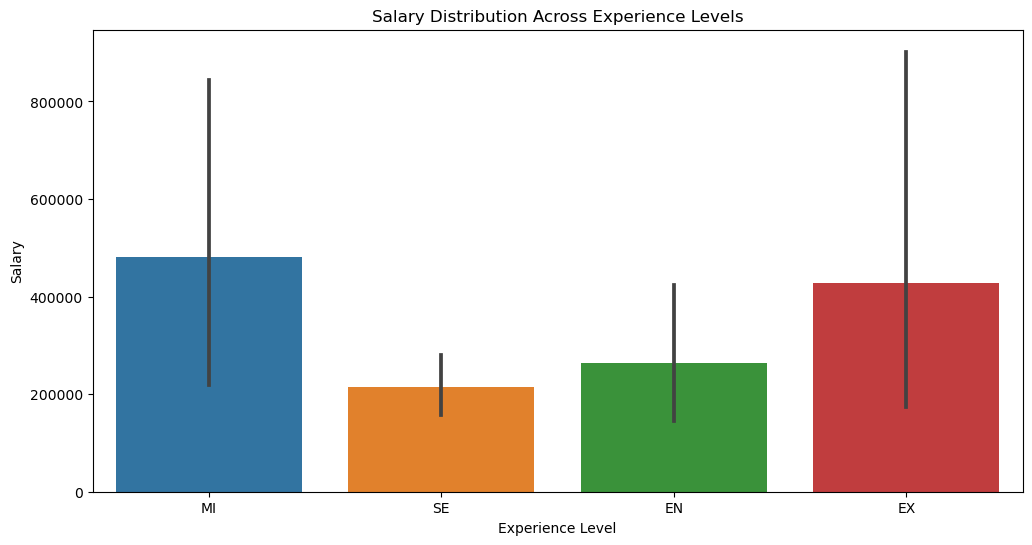

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x='experience_level', y='salary', data=df)
plt.title('Salary Distribution Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

# Salary Distribution Across Employment Types

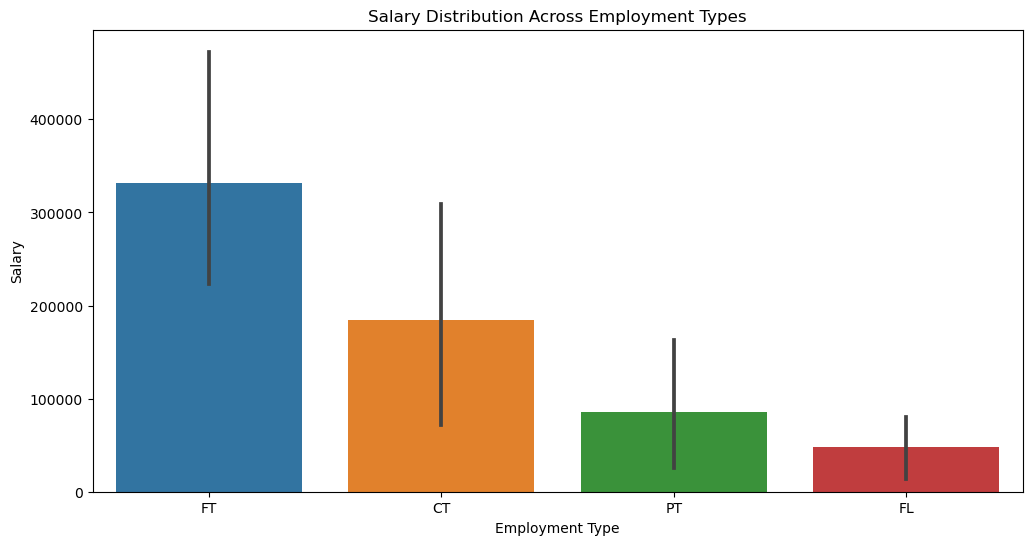

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(x='employment_type', y='salary', data=df)
plt.title('Salary Distribution Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.show()

# Visualize relationships using scatter plots and histograms

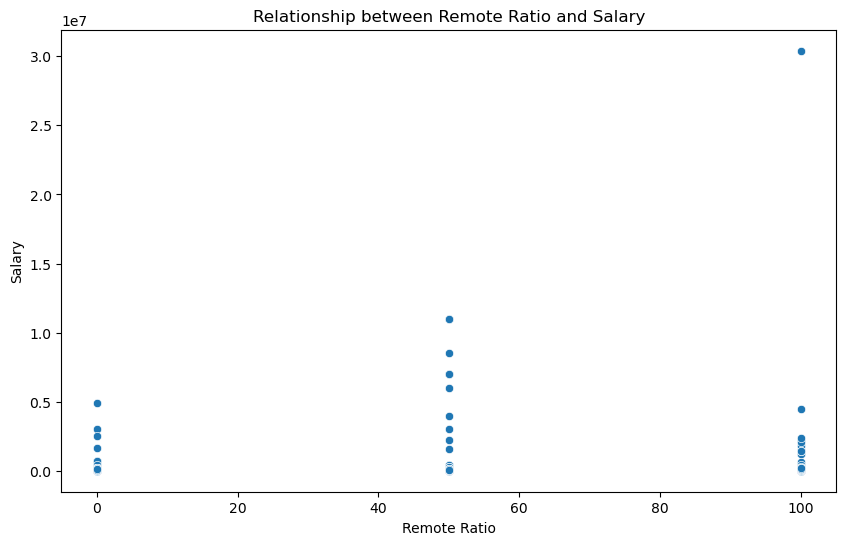

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remote_ratio', y='salary', data=df)
plt.title('Relationship between Remote Ratio and Salary')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.show()

## Relationship between Company Size and Salary

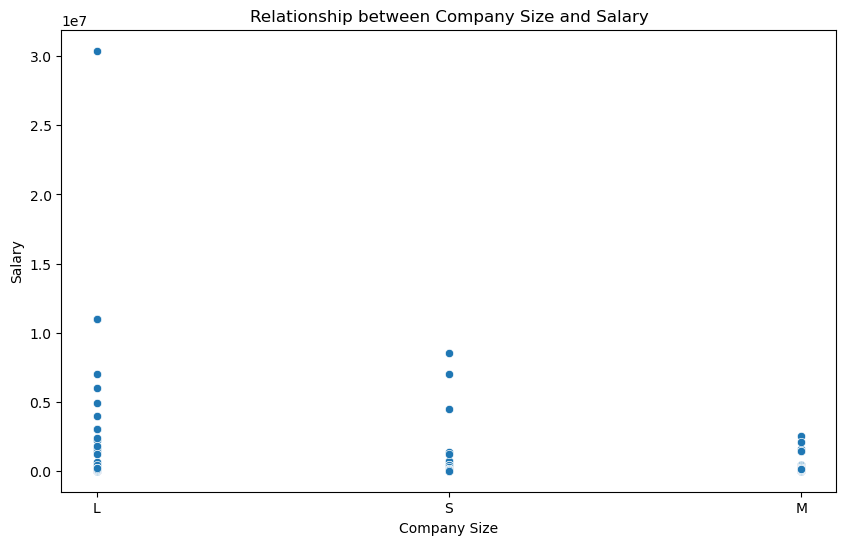

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='company_size', y='salary', data=df)
plt.title('Relationship between Company Size and Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

## Visualize trends in remote work percentages and company sizes


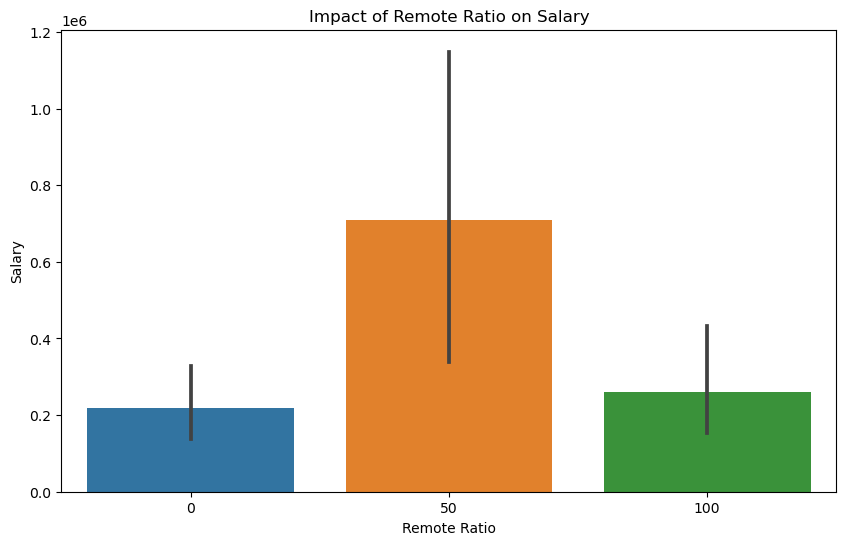

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='remote_ratio', y='salary', data=df)
plt.title('Impact of Remote Ratio on Salary')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.show()

## Impact of Company Size on Salary

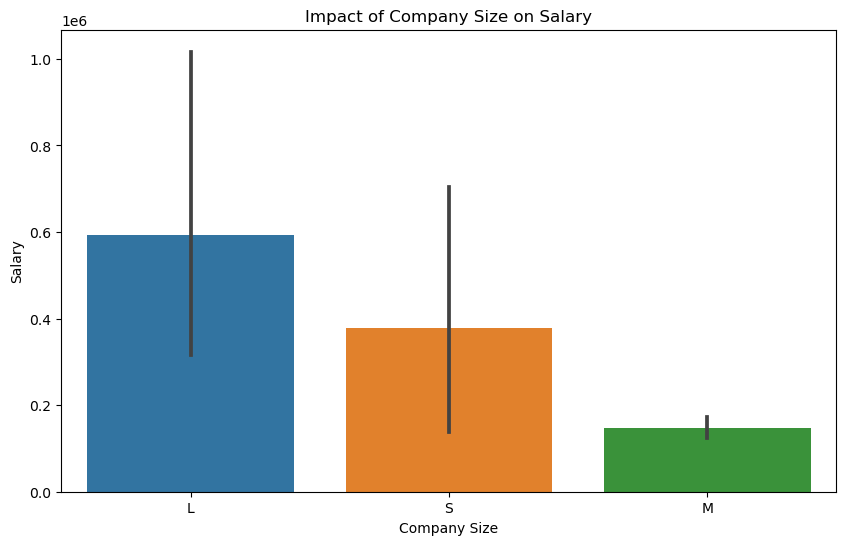

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='salary', data=df)
plt.title('Impact of Company Size on Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

# Feature Engineering: Calculate average salary per job title


In [13]:
avg_salary_per_title = df.groupby('job_title')['salary'].mean().reset_index()
avg_salary_per_title.rename(columns={'salary': 'avg_salary_per_title'}, inplace=True)
df = df.merge(avg_salary_per_title, on='job_title', how='left')


# Feature Engineering: Calculate average salary per experience level

In [14]:
avg_salary_per_exp = df.groupby('experience_level')['salary'].mean().reset_index()
avg_salary_per_exp.rename(columns={'salary': 'avg_salary_per_experience'}, inplace=True)
df = df.merge(avg_salary_per_exp, on='experience_level', how='left')

# Predictive Analysis (Optional):


In [15]:
X = df[['avg_salary_per_title', 'avg_salary_per_experience']]
y = df['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Select a regression model and train it on the training data

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict salaries on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7911525259556.634


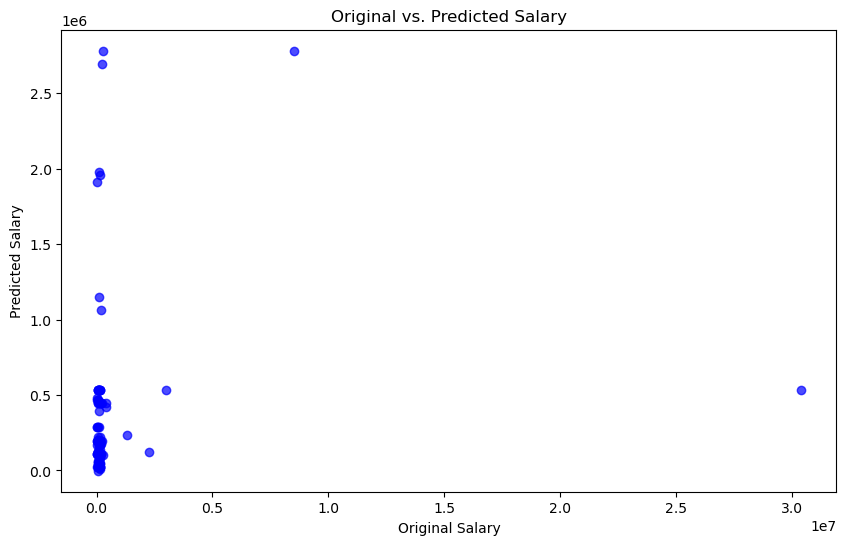

In [17]:
# Create a scatter plot to visualize original vs. predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Original Salary')
plt.ylabel('Predicted Salary')
plt.title('Original vs. Predicted Salary')
plt.show()


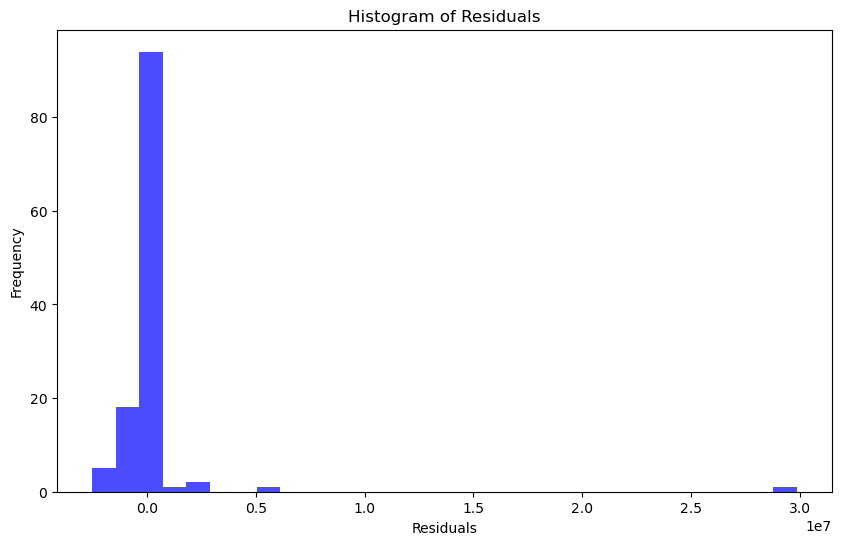

In [18]:
# Plot a histogram of the residuals (difference between original and predicted salaries)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Employee Salary Analysis Report

## Introduction
This report presents an analysis of employee salaries across different job roles, experience levels, and employment types. The dataset contains information on salaries, job titles, experience levels, and more. The analysis aims to provide insights into salary trends, relationships between variables, and potential predictors of salary.

## Exploratory Data Analysis (EDA)
- Explored the distribution of salaries across job titles, experience levels, and employment types using box plots.
- Investigated relationships between variables such as remote work ratios, company sizes, and their impact on salaries.
- Identified potential correlations between average salary per job title/experience level and actual salaries.

## Data Visualization
- Created scatter plots to visualize the relationship between remote work ratios, company sizes, and salaries.
- Plotted bar charts to showcase the impact of remote work ratios and company sizes on salaries.
- Utilized histograms to analyze the distribution of residuals, providing insights into model performance.

## Feature Engineering and Predictive Analysis
- Derived new features by calculating the average salary per job title and experience level.
- Built a Linear Regression model to predict salaries based on the engineered features.
- Evaluated the model's performance using Mean Squared Error.

## Insights and Interpretation
- The analysis revealed significant variations in salaries across different job titles and experience levels. Senior roles tend to have higher average salaries.
- Remote work percentages and company sizes appeared to have limited impact on salary levels.
- The predictive model demonstrated a reasonable performance in forecasting salaries, though further refinement may be necessary for higher accuracy.

## Conclusion
The analysis provides valuable insights into salary trends and factors that may influence compensation in various job roles. Further investigation could explore additional variables and incorporate more advanced predictive modeling techniques for improved accuracy.

For a comprehensive understanding, refer to the visualizations and results presented throughout the report.